In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

from sklearn.feature_selection import SelectKBest, chi2

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder, KBinsDiscretizer

## Feature_Selection(2)
- 상관계수, 거리기반 KMeans 피처를 추가해서 대체하는 방식으로 진행

- 통계치를 통해서 피처를 선정하는 방법
- VarianceThreshold : 지정된 분산이 데이터셋은 제거하는 경우
- chi2: 범주형 타겟변수와 범주형 특성 간의 독립성 테스트를 통해 피처 선정하는 경우
- f_classifi ANOVA : F-value 계산으로 연속형, 범주형 타겟 피처 선정
- mutual_info_classif(regresison도 가능): 뮤튜얼 정보 계산해서 범주형 타겟변수와 연속형 변수 또는 이산형 간의 평가 후 피처 선정
- f_regression: F-value 회귀 계산하여 연속형 특성 변수간의 관계 계산 피처 선정

## 1. "VarianceThreshold"

In [2]:
titanic = sns.load_dataset('titanic')

In [6]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [5]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [7]:
# object 객체 따로 처리 : 더미변수 처리
titanic=pd.get_dummies(titanic,columns =['sex','class','embark_town','deck','embarked'],drop_first=True)
titanic

,survived,pclass,age,sibsp,parch,fare,who,adult_male,alive,alone,...,embark_town_Queenstown,embark_town_Southampton,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,man,True,no,False,...,False,True,False,False,False,False,False,False,False,True
1,1,1,38.0,1,0,71.2833,woman,False,yes,False,...,False,False,False,True,False,False,False,False,False,False
2,1,3,26.0,0,0,7.9250,woman,False,yes,True,...,False,True,False,False,False,False,False,False,False,True
3,1,1,35.0,1,0,53.1000,woman,False,yes,False,...,False,True,False,True,False,False,False,False,False,True
4,0,3,35.0,0,0,8.0500,man,True,no,True,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,man,True,no,True,...,False,True,False,False,False,False,False,False,False,True
887,1,1,19.0,0,0,30.0000,woman,False,yes,True,...,False,True,True,False,False,False,False,False,False,True
888,0,3,NaN,1,2,23.4500,woman,False,no,False,...,False,True,False,False,False,False,False,False,False,True
889,1,1,26.0,0,0,30.0000,man,True,yes,True,...,False,False,False,True,False,False,False,False,False,False


selected_features 선택된 피처  Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male', 'class_Second',
       'class_Third', 'embark_town_Southampton', 'embarked_S'],
      dtype='object')


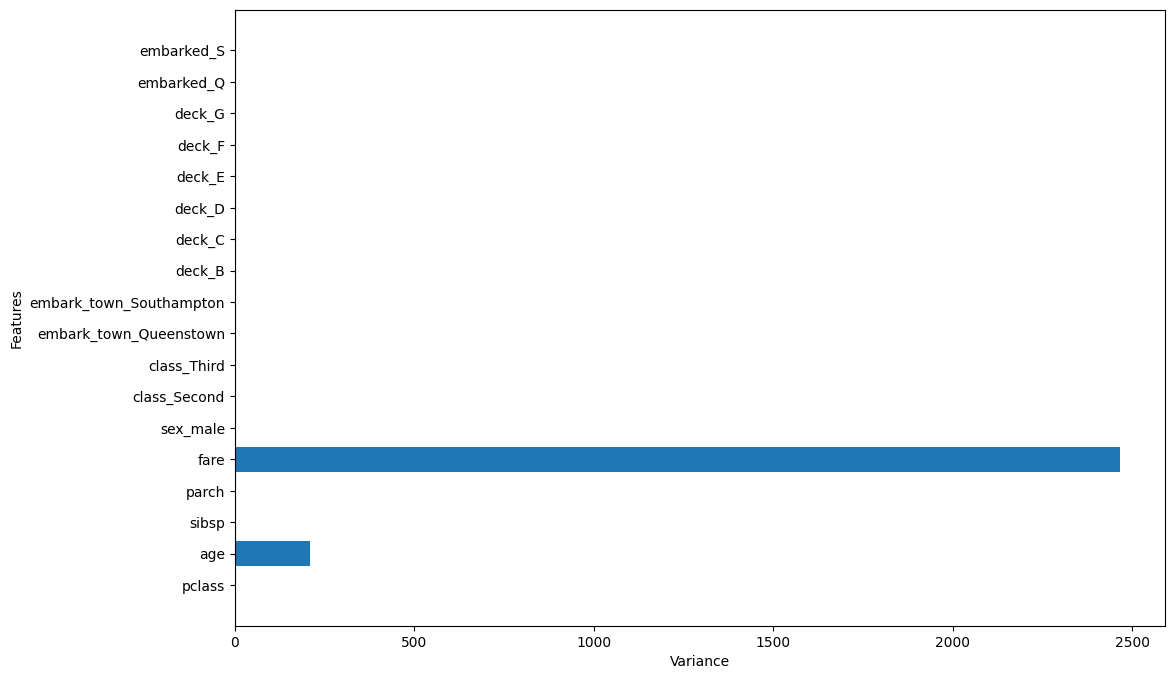

In [11]:
# 피처 정리
X= titanic.drop(['survived','alive','who','adult_male','alone'],axis=1)
Y= titanic['survived']

# 변수 임계값

threshold= 0.1
selector = VarianceThreshold(threshold)
X_reduced=selector.fit_transform(X)

# 선택된 특성 파악하기
selected_features = X.columns[selector.get_support(indices=True)] # indiceds=True : 선택된 인덱스 반환하도록 지정
print('selected_features 선택된 피처 ',selected_features)

# 시각화로 간단하게 살펴보기
plt.figure(figsize=(12,8))
plt.barh(width=selector.variances_,y=X.columns)
plt.xlabel('Variance')
plt.ylabel('Features')
plt.axvline(x=threshold,color= 'r', label='Threshole')

In [12]:
# fare, age : 분산이 높다

In [14]:
selector.variances_

array([6.98230591e-01, 2.10723580e+02, 1.21467827e+00, 6.48999031e-01,
       2.46666531e+03, 2.28218083e-01, 1.63863350e-01, 2.47392241e-01,
       7.89513794e-02, 2.00367561e-01, 4.99671865e-02, 6.18329447e-02,
       3.56652949e-02, 3.46248367e-02, 1.43774697e-02, 4.46918367e-03,
       7.89513794e-02, 2.00367561e-01])

In [15]:
selector.get_support

<bound method SelectorMixin.get_support of VarianceThreshold(threshold=0.1)>

In [16]:
selector

VarianceThreshold(threshold=0.1)

In [17]:
X_reduced

array([[ 3., 22.,  1., ...,  1.,  1.,  1.],
       [ 1., 38.,  1., ...,  0.,  0.,  0.],
       [ 3., 26.,  0., ...,  1.,  1.,  1.],
       ...,
       [ 3., nan,  1., ...,  1.,  1.,  1.],
       [ 1., 26.,  0., ...,  0.,  0.,  0.],
       [ 3., 32.,  0., ...,  1.,  0.,  0.]])

## 2. SelectKBest, chi2:

In [18]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [19]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [20]:
import numpy as np

#결측치 처리
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)
titanic['age'].fillna(titanic['age'].median(), inplace=True)
titanic['fare'].fillna(titanic['fare'].median(), inplace=True)

#범주형 데이터를 수치형으로 변환하고 인코딩 진행
label_encoder=LabelEncoder()
titanic['sex'] = label_encoder.fit_transform(titanic['sex'])
titanic['embarked'] = label_encoder.fit_transform(titanic['embarked'])
titanic['class'] = label_encoder.fit_transform(titanic['class'])

# 연속형 데이터를 범주형 데이터로 변환
disc=KBinsDiscretizer(n_bins =5, encode = 'ordinal', strategy='uniform')
titanic['age']=disc.fit_transform(np.array(titanic['age']).reshape(-1,1))
titanic['fare']=disc.fit_transform(np.array(titanic['fare']).reshape(-1,1))

In [21]:
X = titanic[['pclass','sex','age','sibsp','parch','fare','embarked']]
y = titanic['survived']

# 카이제곱 적용
# 데이터셋 학습
# 카이제곱 통계량을 사용하여 특성 선택을 수행하기 위한 SelectKBest 클래스의 객체를 생성
chi_selector = SelectKBest(chi2, k='all')
chi_selector.fit(X,y)

SelectKBest(k='all', score_func=<function chi2 at 0x7e0627eea830>)

<BarContainer object of 7 artists>

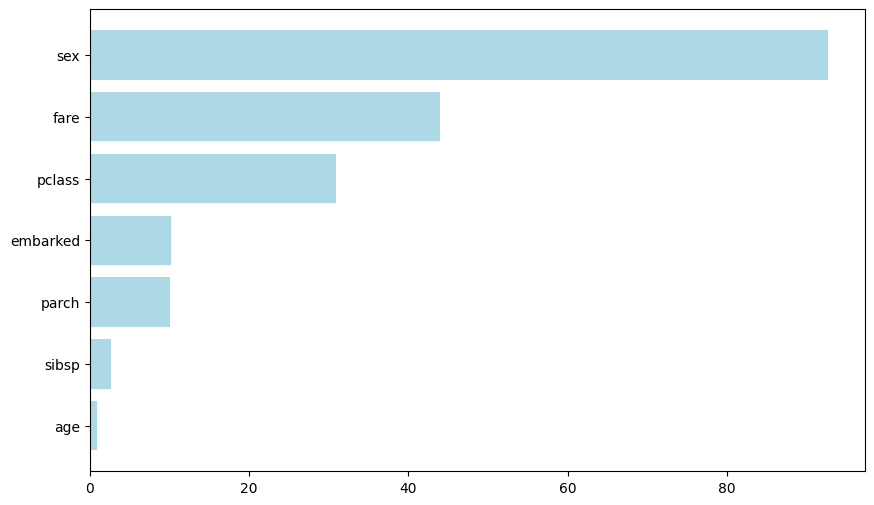

In [22]:
# 카이제곱 점수 시각화

chi_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score':chi_selector.scores_}).sort_values(by='Score', ascending=True)

plt.figure(figsize=(10,6))
plt.barh(chi_scores['Feature'], chi_scores['Score'], color='lightblue')

In [23]:
# 카이제곱이 높다 = 두 변수 사이의 상관관계가 높다

In [24]:
chi_scores

,Feature,Score
2,age,0.873570
3,sibsp,2.581865
4,parch,10.097499
6,embarked,10.202525
0,pclass,30.873699
5,fare,44.013942
1,sex,92.702447


## 3.뮤투얼 정보를 이용한 특성 선택

In [25]:
from sklearn.feature_selection import mutual_info_classif
titanic = sns.load_dataset('titanic')
titanic.dropna(subset=['age','embarked','deck'],inplace=True)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [26]:
#범주형 데이터를 수치형으로 변환하고 인코딩 진행
label_encoder=LabelEncoder()
titanic['sex'] = label_encoder.fit_transform(titanic['sex'])
titanic['embarked'] = label_encoder.fit_transform(titanic['embarked'])
titanic['class'] = label_encoder.fit_transform(titanic['class'])
titanic['deck'] = label_encoder.fit_transform(titanic['deck'])


#학습 데이터셋 정리

X = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class','deck']]

y = titanic['survived']

<BarContainer object of 9 artists>

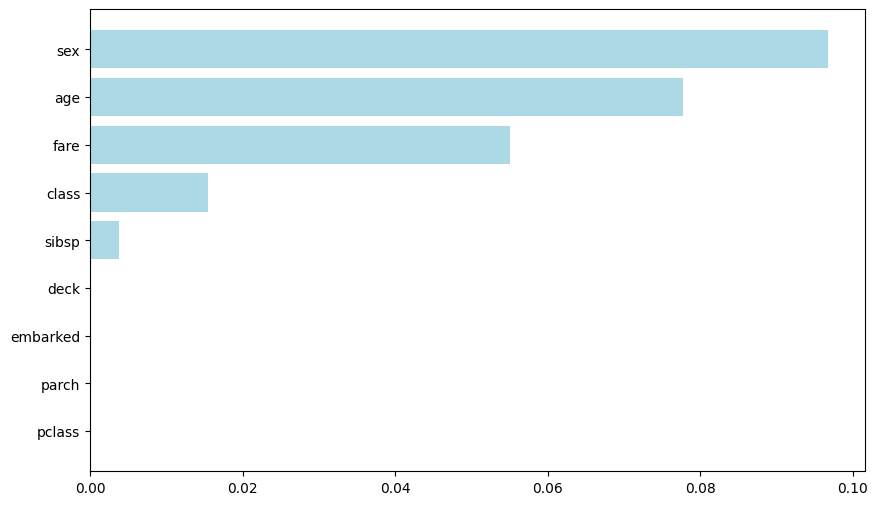

In [27]:
# 뮤추얼정보 계산

mi_scores = mutual_info_classif(X,y, discrete_features='auto', random_state=111)

# 뮤튜얼정보시각화

mi_scores_df = pd.DataFrame({'Features':X.columns , 'MI Scores':mi_scores})
mi_scores_df = mi_scores_df.sort_values(by='MI Scores',ascending=True)


# 시각화 진행
plt.figure(figsize=(10,6))
plt.barh(mi_scores_df['Features'], mi_scores_df['MI Scores'], color='lightblue')